In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cvxopt # convex optimisation module
import SVM as SVM_module
import my_statistics as ms
from tqdm.notebook import tqdm

### Hyperplane in 2D space

In [2]:
X_1, X_2 = np.linspace(-1.5, 1.5, 18), np.linspace(-1.5, 1.5, 18)
X_1_=np.einsum('i,ij->ij',X_1,np.ones((len(X_1),len(X_2))))
X_2_=np.einsum('j,ij->ij',X_2,np.ones((len(X_2),len(X_1))))
values = 1 + 2* X_1_ + 3* X_2_

In [3]:
X_1_gr, X_2_gr = X_1[np.argwhere(values>0)[:,0]], X_2[np.argwhere(values>0)[:,1]]
X_1_le, X_2_le = X_1[np.argwhere(values<0)[:,0]], X_2[np.argwhere(values<0)[:,1]]

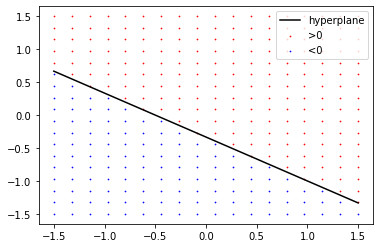

In [4]:
plt.scatter(X_1_gr,X_2_gr, c='r', s=.5, label='>0')
plt.scatter(X_1_le,X_2_le, c='b', s=.5, label='<0')
plt.plot(X_1, -1/3-2/3*X_1, c='k', label='hyperplane')
plt.legend();

### Maximal margin classifier

#### Determination of Lagrange multipliers $\alpha_i$ through Quadratic Programming (QP) optimization

Expected problem formulation for QP:
\begin{equation}
\min \frac{1}{2}\vec{x}^TP\vec{x} + \vec{q}^T\vec{x} ;\quad A\vec{x}=b,\quad G\vec{x} \leq h
\end{equation}

Our formulation:
\begin{equation}
\min \frac{1}{2}\vec{\alpha}^TH\vec{\alpha} - \vec{1}^T\vec{\alpha} ;\quad y^T\vec{\alpha}=0,\quad -\alpha_i \leq 0 \forall i
\end{equation}

#### Scikit-learn's Iris dataset

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns= iris["feature_names"] + ["target"])
# Retain only 2 linearly separable classes
iris_df = iris_df[iris_df["target"].isin([0,1])]
iris_df["target"] = iris_df[["target"]].replace(0,-1)
# Select only 2 attributes
iris_df = iris_df[["petal length (cm)", "petal width (cm)", "target"]]
iris_df.head(1)

,petal length (cm),petal width (cm),target
0,1.4,0.2,-1.0


In [6]:
X = iris_df[["petal length (cm)", "petal width (cm)"]].to_numpy()
y = iris_df[["target"]].to_numpy()

In [7]:
w, b, M = SVM_module.SVM(X,y, S_=2)

     pcost       dcost       gap    pres   dres
 0: -5.8693e+00 -1.1241e+01  3e+02  1e+01  2e+00
 1: -5.9277e+00 -3.6988e+00  4e+01  2e+00  3e-01
 2: -1.0647e+00 -1.9434e+00  5e+00  2e-01  2e-02
 3: -6.5979e-01 -1.1956e+00  6e-01  6e-03  8e-04
 4: -8.3813e-01 -1.2988e+00  5e-01  3e-03  4e-04
 5: -1.1588e+00 -1.1784e+00  2e-02  8e-05  1e-05
 6: -1.1763e+00 -1.1765e+00  2e-04  8e-07  1e-07
 7: -1.1765e+00 -1.1765e+00  2e-06  8e-09  1e-09
 8: -1.1765e+00 -1.1765e+00  2e-08  8e-11  1e-11
Optimal solution found.


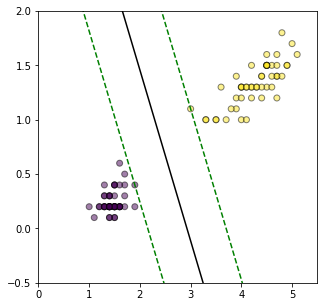

In [8]:
x_min=0
x_max=5.5
plt.figure(figsize=(5,5))
plt.xlim(x_min,x_max)
plt.ylim(-.5,2)
x1_values = np.linspace(x_min,x_max,100)
hyperplane_X1 = (-1*x1_values*w[0]- b)/w[1]
poz_margin_line = hyperplane_X1 + np.sqrt(1 + (w[0]/w[1])**2)*M
neg_margin_line = hyperplane_X1 - np.sqrt(1 + (w[0]/w[1])**2)*M
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, edgecolors="black")
plt.plot(x1_values, hyperplane_X1, color='k')
plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
plt.plot(x1_values, neg_margin_line, c='g',ls='--' )

#### Random data divided into groups on the basis of ref_plane function parameters

In [9]:
def ref_plane(X,Y):
    return 1 + 2* X + 10* Y

In [10]:
no_of_points = 50
X1 = np.random.random(no_of_points)*3 - 1.5
X2 = np.random.random(no_of_points)*3 - 1.5
values = ref_plane(X1, X2)
classes, class_color = np.where(values>0, 1, -1), np.where(values>0, 'r', 'b')
X = np.concatenate([X1[:,np.newaxis], X2[:,np.newaxis]], axis = 1)
Y = np.array(classes, dtype=float)

In [11]:
w, b, M = SVM_module.SVM(X, Y[:,np.newaxis], S_=2)

     pcost       dcost       gap    pres   dres
 0: -1.2399e+01 -2.6483e+01  1e+02  1e+01  2e+00
 1: -3.2431e+01 -3.5160e+01  6e+01  4e+00  9e-01
 2: -1.0108e+02 -9.7624e+01  6e+01  4e+00  9e-01
 3: -1.7631e+02 -1.6283e+02  1e+02  4e+00  8e-01
 4: -1.1994e+02 -1.2357e+02  1e+02  2e+00  4e-01
 5: -8.9268e+01 -9.1600e+01  8e+00  8e-02  2e-02
 6: -8.8136e+01 -8.8161e+01  8e-02  8e-04  2e-04
 7: -8.8126e+01 -8.8127e+01  8e-04  8e-06  2e-06
 8: -8.8126e+01 -8.8126e+01  8e-06  8e-08  2e-08
Optimal solution found.


In [12]:
w, b, M

(array([ 3.17427651, 12.89093863]), 1.8170145989942874, 0.07532385980163642)

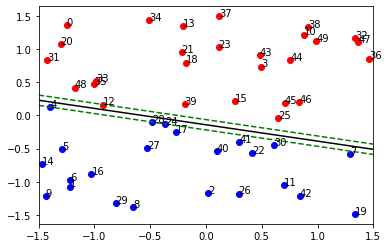

In [13]:
x_min=-1.5
x_max=1.5
plt.xlim(x_min,x_max)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c=class_color[i])
    plt.annotate(i, (X[i,0], X[i,1]))
x1_values = np.linspace(-1.5,1.5,100)
hyperplane_X1 = (-1*x1_values*w[0]- b)/w[1]
poz_margin_line = hyperplane_X1 + np.sqrt(1 + (w[0]/w[1])**2)*M
neg_margin_line = hyperplane_X1 - np.sqrt(1 + (w[0]/w[1])**2)*M
plt.plot(x1_values, hyperplane_X1, color='k')
plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
plt.plot(x1_values, neg_margin_line, c='g',ls='--' )

In [14]:
X_test = np.array([1.5, -0.2])
value = SVM_module.get_SVM_val(X_test, w, b)

In [15]:
value, SVM_module.SVM_predict(X_test[np.newaxis], w, b)

(4.000241633419699, array([1.]))

#### SVM class

In [16]:
from SVM_class import SVM
from SVM_class import k_fold_CV_for_SVM

In [17]:
svm_ = SVM(X, Y[:,np.newaxis],kernel='linear')

In [18]:
# generation of sep. plane param
svm_.train()

In [19]:
# testing data generation
no_of_points_test = 100
X1_test = np.random.random(no_of_points_test)*3 - 1.5
X2_test = np.random.random(no_of_points_test)*3 - 1.5
values_test = ref_plane(X1_test, X2_test)
classes_test = np.where(values_test>0, 1., -1.)
X_test = np.concatenate([X1_test[:,np.newaxis], X2_test[:,np.newaxis]], axis = 1)
Y_test = np.array(classes_test, dtype=float)

In [20]:
SVM_pred = svm_.predict(X_test)

In [21]:
ms.confusion_matrix(SVM_pred, classes_test, classes=[-1,1], print_=True);

+-------------+-----------------------+------------------------+------+
| True status |           No          |          Yes           | Sums |
+-------------+-----------------------+------------------------+------+
|  Prediciton |                       |                        |      |
|      No     |         TN = 42       |         FN = 0         |  42  |
|     Yes     |         FP = 1        |         TP = 57        |  58  |
|             | specificity = 97.67 % | sensitivity = 100.00 % |      |
|     Sums    |           42          |           57           | 100  |
+-------------+-----------------------+------------------------+------+


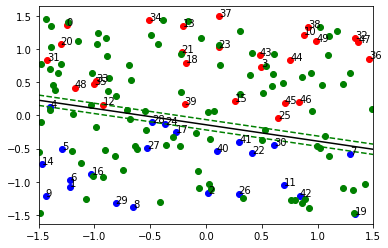

In [22]:
x_min=-1.5
x_max=1.5
plt.xlim(x_min,x_max)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c=class_color[i])
    plt.annotate(i, (X[i,0], X[i,1]))
x1_values = np.linspace(-1.5,1.5,100)
hyperplane_X1 = (-1*x1_values*svm_.w[0]- svm_.b)/w[1]
poz_margin_line = hyperplane_X1 + np.sqrt(1 + (w[0]/w[1])**2)*M
neg_margin_line = hyperplane_X1 - np.sqrt(1 + (w[0]/w[1])**2)*M
plt.plot(x1_values, hyperplane_X1, color='k')
plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
plt.plot(x1_values, neg_margin_line, c='g',ls='--' )
plt.scatter(X_test[:,0], X_test[:,1], c='green')

### SVM with Scikit-learn

In [23]:
from sklearn import svm

In [24]:
svm_cl = svm.SVC(kernel='linear')

In [25]:
svm_cl.fit(X[1::2], Y[1::2]);

In [26]:
Y_pred = svm_cl.predict(X[::2])

In [27]:
Y_pred_color = np.where(Y_pred==1, 'r', 'b')

### Support Vector Classifier - Soft Margin SVM

In [28]:
def ref_plane(X,Y):
    return 1 + 2* X + 10* Y

In [29]:
no_of_points = 150
mixing_level = 3
X1 = np.random.random(no_of_points)*3 - 1.5
X2 = np.random.random(no_of_points)*3 - 1.5
values = ref_plane(X1, X2)
values[abs(values)<mixing_level] = values[abs(values)<mixing_level]*np.sign(np.random.normal())
classes, class_color = np.where(values>0, 1, -1), np.where(values>0, 'r', 'b')
X = np.concatenate([X1[:,np.newaxis], X2[:,np.newaxis]], axis = 1)
Y = np.array(classes, dtype=float)

In [30]:
svm_soft_M = SVM(X, Y[:,np.newaxis], C = 4, kernel='linear')
svm_soft_M.train()

In [31]:
# testing data generation
no_of_points_test = 100
X1_test = np.random.random(no_of_points_test)*3 - 1.5
X2_test = np.random.random(no_of_points_test)*3 - 1.5
values_test = ref_plane(X1_test, X2_test)
classes_test = np.where(values_test>0, 1., -1.)
X_test = np.concatenate([X1_test[:,np.newaxis], X2_test[:,np.newaxis]], axis = 1)
Y_test = np.array(classes_test, dtype=float)

In [32]:
SVM_pred = svm_soft_M.predict(X_test)

In [33]:
ms.confusion_matrix(SVM_pred, classes_test, classes=[-1,1], print_=True);

+-------------+-----------------------+------------------------+------+
| True status |           No          |          Yes           | Sums |
+-------------+-----------------------+------------------------+------+
|  Prediciton |                       |                        |      |
|      No     |         TN = 39       |         FN = 0         |  39  |
|     Yes     |         FP = 2        |         TP = 59        |  61  |
|             | specificity = 95.12 % | sensitivity = 100.00 % |      |
|     Sums    |           39          |           59           | 100  |
+-------------+-----------------------+------------------------+------+


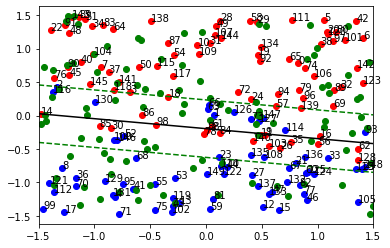

In [34]:
x_min=-1.5
x_max=1.5
plt.xlim(x_min,x_max)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c=class_color[i])
    plt.annotate(i, (X[i,0], X[i,1]))
x1_values = np.linspace(-1.5,1.5,100)
hyperplane_X1 = (-1*x1_values*svm_soft_M.w[0]- svm_soft_M.b)/svm_soft_M.w[1]
poz_margin_line = hyperplane_X1 + np.sqrt(1 + (svm_soft_M.w[0]/svm_soft_M.w[1])**2)*svm_soft_M.M
neg_margin_line = hyperplane_X1 - np.sqrt(1 + (svm_soft_M.w[0]/svm_soft_M.w[1])**2)*svm_soft_M.M
plt.plot(x1_values, hyperplane_X1, color='k')
plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
plt.plot(x1_values, neg_margin_line, c='g',ls='--' )
plt.scatter(X_test[:,0], X_test[:,1], c='green')
#plt.scatter(X[(svm_soft_M.alphas>1e-3).flatten(), 0], X[(svm_soft_M.alphas>1e-3).flatten(), 1], color='yellow')

In [35]:
C_for_CV = np.linspace(0,10,50)
err_SVM_CV, C_opt = k_fold_CV_for_SVM(X, Y, C=C_for_CV, k=10)

Main loop:   0%|          | 0/50 [00:00<?, ?it/s]

loop for K = 0.0:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 0.20408163265306123:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 0.40816326530612246:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 0.6122448979591837:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 0.8163265306122449:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 1.0204081632653061:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 1.2244897959183674:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 1.4285714285714286:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 1.6326530612244898:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 1.836734693877551:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 2.0408163265306123:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 2.2448979591836737:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 2.4489795918367347:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 2.6530612244897958:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 2.857142857142857:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 3.0612244897959187:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 3.2653061224489797:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 3.4693877551020407:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 3.673469387755102:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 3.8775510204081636:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 4.081632653061225:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 4.285714285714286:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 4.4897959183673475:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 4.6938775510204085:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 4.8979591836734695:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 5.1020408163265305:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 5.3061224489795915:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 5.510204081632653:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 5.714285714285714:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 5.918367346938775:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 6.122448979591837:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 6.326530612244898:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 6.530612244897959:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 6.73469387755102:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 6.938775510204081:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 7.142857142857143:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 7.346938775510204:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 7.551020408163265:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 7.755102040816327:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 7.959183673469388:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 8.16326530612245:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 8.36734693877551:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 8.571428571428571:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 8.775510204081632:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 8.979591836734695:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 9.183673469387756:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 9.387755102040817:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 9.591836734693878:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 9.795918367346939:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 10.0:   0%|          | 0/10 [00:00<?, ?it/s]

In [36]:
print(f'C_opt = {C_opt}')

C_opt = 0.20408163265306123


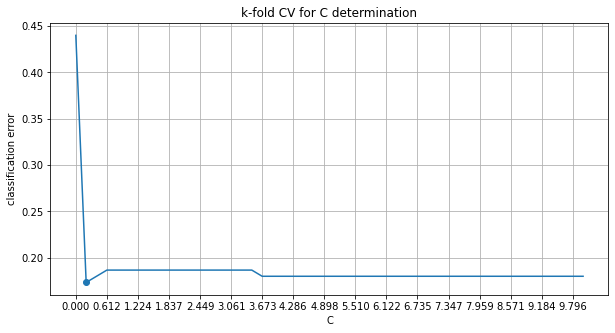

In [37]:
plt.figure(figsize=(10,5))
plt.plot(C_for_CV, err_SVM_CV)
plt.scatter(C_for_CV[np.argmin(err_SVM_CV)], err_SVM_CV[np.argmin(err_SVM_CV)])
plt.ylabel('classification error')
plt.xlabel('C')
plt.title('k-fold CV for C determination')
plt.grid()
plt.xticks(C_for_CV[::3]);

## SVM

In [38]:
def ref_plane(X,Y):
    return X**2 -.1*X - .06 - Y/2

In [39]:
no_of_points = 150
mixing_level = 0
X1 = np.random.random(no_of_points)*3 - 1.5
X2 = np.random.random(no_of_points)*3 - 1.5
values = ref_plane(X1, X2)
values[abs(values)<mixing_level] = values[abs(values)<mixing_level]*np.sign(np.random.normal())
classes, class_color = np.where(values>0, 1, -1), np.where(values>0, 'r', 'b')
X = np.concatenate([X1[:,np.newaxis], X2[:,np.newaxis]], axis = 1)
Y = np.array(classes, dtype=float)

In [40]:
sv = np.where(svm_soft_M.alphas>1e-5)[0]

In [41]:
svm_soft_M = SVM(X, Y[:,np.newaxis], C = 4, kernel='polynomial', d=2)
svm_soft_M.train()

In [42]:
# testing data generation
no_of_points_test = 100
X1_test = np.random.random(no_of_points_test)*3 - 1.5
X2_test = np.random.random(no_of_points_test)*3 - 1.5
values_test = ref_plane(X1_test, X2_test)
classes_test = np.where(values_test>0, 1., -1.)
X_test = np.concatenate([X1_test[:,np.newaxis], X2_test[:,np.newaxis]], axis = 1)
Y_test = np.array(classes_test, dtype=float)

In [43]:
#svm_soft_M.b

In [44]:
SVM_pred = svm_soft_M.predict(X_test)

In [45]:
#SVM_pred = np.sign(np.sum(svm_soft_M.alphas.flatten()[svm_soft_M.sv] * svm_soft_M.y[svm_soft_M.sv].flatten() * svm_soft_M.polynomial_kernel(X_test, svm_soft_M.X[svm_soft_M.sv]), axis=1))

In [46]:
ms.confusion_matrix(SVM_pred, classes_test, classes=[-1,1], print_=True);

+-------------+-----------------------+-----------------------+------+
| True status |           No          |          Yes          | Sums |
+-------------+-----------------------+-----------------------+------+
|  Prediciton |                       |                       |      |
|      No     |         TN = 21       |         FN = 1        |  22  |
|     Yes     |         FP = 1        |         TP = 77       |  78  |
|             | specificity = 95.45 % | sensitivity = 98.72 % |      |
|     Sums    |           22          |           78          | 100  |
+-------------+-----------------------+-----------------------+------+


#### Določitev območij razredov

In [47]:
X1_test_vals = np.linspace(-1.5, 1.5, 100)
X2_test_vals = np.linspace(-1.5, 1.5, 100)
predictions_ = np.zeros((X1_test_vals.shape[0],X2_test_vals.shape[0]))
test_set = np.zeros((X1_test_vals.shape[0],X2_test_vals.shape[0],2))
for i in range(X1_test_vals.shape[0]):
    for j in range(X2_test_vals.shape[0]):
        test_set[i,j,:] = np.array((X1_test_vals[i], X2_test_vals[j]))
test_set = test_set.reshape((100*100,2))

In [48]:
grid_vals = svm_soft_M.get_SVM_val(test_set).reshape((100,100))
hyperplane_data = np.where((grid_vals<1e-1)&(grid_vals>-1e-1))

In [49]:
hyperplane_points = np.zeros((hyperplane_data[0].shape[0]+2,2))
for i in range(hyperplane_data[0].shape[0]):
    hyperplane_points[i+1,:] = X1_test_vals[hyperplane_data[0][i]],X2_test_vals[hyperplane_data[1][i]]
hyperplane_points[0,:] = -1.5, 1.5
hyperplane_points[-1,:] = 1.5, 1.5

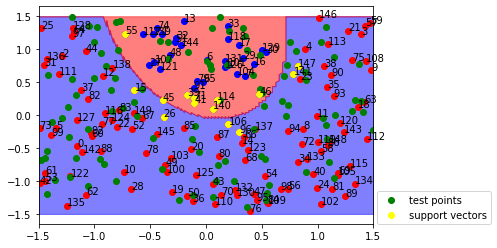

In [50]:
x_min=-1.5
x_max=1.5
plt.xlim(x_min,x_max)
plt.fill_between((hyperplane_points[:,0]), hyperplane_points[:,1], -1.5, color='blue', alpha=.5)
plt.fill_between((hyperplane_points[:,0]), hyperplane_points[:,1], 1.5, color='red', alpha=.5)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c=class_color[i])
    plt.annotate(i, (X[i,0], X[i,1]))
x1_values = np.linspace(-1.5,1.5,100)
#hyperplane_X1 = (-1*x1_values*svm_soft_M.w[0]- svm_soft_M.b)/svm_soft_M.w[1]
#poz_margin_line = hyperplane_X1 + np.sqrt(1 + (svm_soft_M.w[0]/svm_soft_M.w[1])**2)*svm_soft_M.M
#neg_margin_line = hyperplane_X1 - np.sqrt(1 + (svm_soft_M.w[0]/svm_soft_M.w[1])**2)*svm_soft_M.M
#plt.plot(x1_values, hyperplane_X1, color='k')
#plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
#plt.plot(x1_values, neg_margin_line, c='g',ls='--' )
plt.scatter(X_test[:,0], X_test[:,1], c='green', label='test points')
plt.scatter(X[(svm_soft_M.alphas>1e-3).flatten(), 0], X[(svm_soft_M.alphas>1e-3).flatten(), 1], color='yellow', label='support vectors')
plt.legend(loc=(1.01,0))